In [512]:
import pandas as pd
import numpy as np
from dataset_dir import stata_dir
from dataset_dir import excel_dir
import os
import seaborn as sns
from pandas_profiling import ProfileReport
import datetime
date_today= datetime.date.today()


pd.io.formats.excel.ExcelFormatter.header_style = None

pd.options.display.max_rows = None
pd.options.display.max_columns = None

r=pd.read_stata(stata_dir()+"Teamup_Women_Dataset_cleanv4.dta",convert_categoricals=False)
print("Configuration Complete!")

Configuration Complete!


In [5]:
# r=r.loc[(r['level1']=='nigeria') & (r['consent']==1) & (r['result']==1) ]
r.shape

(1530, 10400)

In [6]:
focus_trad_strategies={1:'Withdrawal',9:'Rhythm',5:'Herbs'}
trad_strategies={1:'Withdrawal',2:'Abstinence_Rhythm',3:'counting_plus',4:'concoctions',
            5:'herbs',6:'Rings_amulets_charms_and_waist_strings',7:'Lactational_Amenorrhea_method',
            8:'Non_LAM_breastfeeding',9:'Standard_days_method',10:'Cervical_mucus_strategy',
            11:'basal_body_temperature_strategy',21:'Douching',22:'Drinking_a_cold_drink',23:'Taking_a_cold_shower',24:'Masturbation',25:'Sex_Toys_Aids',26:'Intercrural_sex',27:'Oral_sex',28:'Anal_sex'}


In [750]:
def replace_yesno(col_name,m):
    m[col_name]=m[col_name].replace(1,"Yes")
    m[col_name]=m[col_name].replace(0,"No")
    return m
def replace_degree(col_name,m):
    m[col_name]=m[col_name].replace(1,"All the time")
    m[col_name]=m[col_name].replace(2,"Most of the time")
    m[col_name]=m[col_name].replace(3,"Some of the time")
    m[col_name]=m[col_name].replace(4,"Once")
    m[col_name]=m[col_name].replace(5,"rarely")

In [19]:
strategies={1:'Withdrawal',9:'Rhythm',5:'Herbs'}

check_population=[]
def new_profiles(data):
    for k,v in zip(data.keys(),data.values()):
        k=str(k)
        select_cols=['q221i_%s'%k,'q221a_%s'%k,'q221g_%s'%k,'q220f_%s'%k,'q221f_%s'%k,'q221d_%s'%k,'q216c_%s'%k,'q209a','q209b','q211a_%s'%k,'q215_%s'%k,'q220d_%s'%k,'q220a_%s'%k,'q220g_%s'%k,'q211c_%s'%k,'q220i_%s'%k,'q224_%s'%k,'resp_select'] 
        def replaceables(m):
            replace_yesno('Used any strategy in the last 2-6 months (q209b)',m)
            replace_yesno('Used any strategy in the last 1 month (q209a)',m)
            replace_yesno('Used %s in the last 1 month (q211a_%s)'%(v,k),m)
            replace_yesno('Used %s in last 2-6 months (q215_%s)'%(v,k),m)
            replace_yesno('Still using %s[1st selection] (q220d_%s)'%(v,k),m)
            replace_yesno('Still using %s[2nd selection] (q221d_%s)'%(v,k),m)
            replace_yesno('Probe: used %s in the last 1 month (q211c_%s)'%(v,k),m) 
            replace_yesno('Probe: used %s in last 2-6 months (q216c_%s)'%(v,k),m) 
            replace_yesno('Used %s with another strategy[1st selection] (q220g_%s)'%(v,k),m)
            replace_yesno('Used %s with another strategy[2nd selection] (q221g_%s)'%(v,k),m)
            replace_yesno('When you stopped using %s, did you start using another strategy? (q220f_%s)'%(v,k),m)
            replace_yesno('When you stopped using %s, did you start using another strategy? (q221f_%s)'%(v,k),m)
            replace_yesno('From any time in the past, ever used %s (q224_%s)'%(v,k),m)
            replace_degree('How often respondent used %s in the last 2-6 months [1st selection] (q220a_%s)'%(v,k),m)
            replace_degree('How often respondent used %s in the last 2-6 months [2nd selection] (q221a_%s)'%(v,k),m)
            replace_degree('How often respondent used %s with another strategy [1st selection] (q220i_%s)'%(v,k),m)
            replace_degree('How often respondent used %s with another strategy [2nd selection] (q221i_%s)'%(v,k),m)
            return m               
        def gen_df(n):
            holder=pd.DataFrame({'id':n['resp_select'],
                'Used any strategy in the last 1 month (q209a)':n['q209a'],
                             'Used any strategy in the last 2-6 months (q209b)':n['q209b'],
                             'Used %s in the last 1 month (q211a_%s)'%(v,k):n['q211a_%s'%k],
                             'Used %s in last 2-6 months (q215_%s)'%(v,k):n['q215_%s'%k],
                             'Still using %s[1st selection] (q220d_%s)'%(v,k):n['q220d_%s'%k],
                             'Still using %s[2nd selection] (q221d_%s)'%(v,k):n['q221d_%s'%k],
                             'When you stopped using %s, did you start using another strategy? (q220f_%s)'%(v,k):n['q220f_%s'%k],
                             'When you stopped using %s, did you start using another strategy? (q221f_%s)'%(v,k):n['q221f_%s'%k],

                            'Probe: used %s in the last 1 month (q211c_%s)'%(v,k):n['q211c_%s'%k],
                                 'Probe: used %s in last 2-6 months (q216c_%s)'%(v,k):n['q216c_%s'%k],
                             'How often respondent used %s in the last 2-6 months [1st selection] (q220a_%s)'%(v,k):n['q220a_%s'%k],
                             'How often respondent used %s in the last 2-6 months [2nd selection] (q221a_%s)'%(v,k):n['q221a_%s'%k],
                             'Used %s with another strategy[1st selection] (q220g_%s)'%(v,k):n['q220g_%s'%k],
                             'Used %s with another strategy[2nd selection] (q221g_%s)'%(v,k):n['q221g_%s'%k],
                             'How often respondent used %s with another strategy [1st selection] (q220i_%s)'%(v,k):n['q220i_%s'%k],
                             'How often respondent used %s with another strategy [2nd selection] (q221i_%s)'%(v,k):n['q221i_%s'%k],
                             'From any time in the past, ever used %s (q224_%s)'%(v,k):n['q224_%s'%k]   
                                })
            return holder
   # ------------------------------------------------------------------------------------------------     
        #                         *****************CONSISTENT USER
   # ------------------------------------------------------------------------------------------------  
        
        n=r.loc[
        ((r['q211a_%s'%k]==1.0) |(r['q211c_%s'%k]==1.0) | (r['q215_%s'%k]==1.0) | (r['q216c_%s'%k]==1.0)) #respondent used target strategy in last 1-6 months
        # &
        # ((r['q220a_%s'%k]==1.0) | (r['q220a_%s'%k]==2.0) | (r['q221a_%s'%k]==1.0) | (r['q221a_%s'%k]==2.0))#how often you used withdrawal in last 6 months
        &
        ((r['q220f_%s'%k]!=1.0) & (r['q221f_%s'%k]!=1.0)) #didnt switch to another strategy   
        # &
        # (r['q220a_%s'%k].notnull())
        &
        ((r['q220g_%s'%k]!=1.0) & (r['q221g_%s'%k]!=1.0)) #didnt use strategy with other strategy
        ][select_cols]
        ce=gen_df(n)
   # ------------------------------------------------------------------------------------------------     
        #                                     INCONSISTENT EXCLUSIVE or INCONSISTENT USER
   # ------------------------------------------------------------------------------------------------    
        n=r.loc[
        ((r['q211a_%s'%k]==1.0) |(r['q211c_%s'%k]==1.0) | (r['q215_%s'%k]==1.0) | (r['q216c_%s'%k]==1.0)) #respondent used target strategy in last 1-6 months
        &
        ((r['q220a_%s'%k]==3.0) | (r['q220a_%s'%k]==4.0) |(r['q220a_%s'%k]==5.0) | (r['q221a_%s'%k]==3.0) | (r['q221a_%s'%k]==4.0) | (r['q221a_%s'%k]==5.0))#how often you used withdrawal in last 6 months
        &
        ((r['q220f_%s'%k]!=1.0) & (r['q221f_%s'%k]!=1.0)) #didnt switch to another strategy   
        # &
        # (r['q220a_%s'%k].notnull())
        &
        ((r['q220g_%s'%k]==0.0) | (r['q221g_%s'%k]==0.0)) #used withdrawal with other method
        ][select_cols]

        ie=gen_df(n)
   # ------------------------------------------------------------------------------------------------     

#                        ********CONCURRENT USER********************
# --------------------------------------------------------------------------------------------

        n=r[
    (
         
        
    ((r['q211a_%s'%k]==1)&((r['q211a_1']==1)|(r['q211a_5']==1)|(r['q211a_9']==1) | (r['q211a_12']==1)
 | (r['q211a_13']==1)
 | (r['q211a_14']==1)
 | (r['q211a_15']==1)
 | (r['q211a_16']==1)
 | (r['q211a_17']==1)
 | (r['q211a_18']==1)
 | (r['q211a_19']==1)
 | (r['q211a_20']==1)))
    
|
 ((r['q211c_%s'%k]==1)&((r['q211c_1']==1)|(r['q211c_5']==1)|(r['q211c_9']==1)  | (r['q211c_12']==1)
 | (r['q211c_13']==1)
 | (r['q211c_14']==1)
 | (r['q211c_15']==1)
 | (r['q211c_16']==1)
 | (r['q211c_17']==1)
 | (r['q211c_18']==1)
 | (r['q211c_19']==1)
 | (r['q211c_20']==1)))
   
|
 ((r['q215_%s'%k]==1)&((r['q215_1']==1)|(r['q215_5']==1)|(r['q215_9']==1)  | (r['q215_12']==1)
 | (r['q215_13']==1)
 | (r['q215_14']==1)
 | (r['q215_15']==1)
 | (r['q215_16']==1)
 | (r['q215_17']==1)
 | (r['q215_18']==1)
 | (r['q215_19']==1)
 | (r['q215_20']==1)) )
   
|
 ((r['q216c_%s'%k]==1)&((r['q216c_1']==1)|(r['q216c_5']==1)|(r['q216c_9']==1)  | (r['q216c_12']==1)
 | (r['q216c_13']==1)
 | (r['q216c_14']==1)
 | (r['q216c_15']==1)
 | (r['q216c_16']==1)
 | (r['q216c_17']==1)
 | (r['q216c_18']==1)
 | (r['q216c_19']==1)
 | (r['q216c_20']==1)) )) & ((r['q220g_%s'%k]==1.0) | (r['q221g_%s'%k]==1.0))][select_cols]

        cc=gen_df(n)
        
   # ------------------------------------------------------------------------------------------------     
        #                                     CONSISTENT SPORADIC
   # ------------------------------------------------------------------------------------------------  

        n=r.loc[
        ((r['q211a_%s'%k]==1.0) |(r['q211c_%s'%k]==1.0) | (r['q215_%s'%k]==1.0) | (r['q216c_%s'%k]==1.0)) #respondent used withdrawal in last 6 months
        &
        ((r['q220a_%s'%k]==1.0) | (r['q220a_%s'%k]==2.0) | (r['q221a_%s'%k]==1.0) | (r['q221a_%s'%k]==2.0) )#respondent uses withdrawal with another method ALL OF THE TIME or MOST OF THE TIME
        &
        ((r['q220i_%s'%k]==3.0) | (r['q220i_%s'%k]==4.0) | (r['q221i_%s'%k]==3.0) | (r['q221i_%s'%k]==4.0) )#respondent uses withdrawal with another method ALL OF THE TIME or MOST OF THE TIME
        #  &
        # ((r['q221i_%s'%k].notna() & (r['q221i_%s'%k].notna()))
        ][select_cols]

        cs=gen_df(n)
   # ------------------------------------------------------------------------------------------------     
        #                                     INCONSISTENT SPORADIC
   # ------------------------------------------------------------------------------------------------ 
        n=r.loc[
        ((r['q211a_%s'%k]==1.0) |(r['q211c_%s'%k]==1.0) | (r['q215_%s'%k]==1.0) | (r['q216c_%s'%k]==1.0)) #respondent used withdrawal in last 6 months
        &
        ((r['q220a_%s'%k]==3.0) | (r['q220a_%s'%k]==4.0) | (r['q221a_%s'%k]==3.0) | (r['q221a_%s'%k]==4.0) )#respondent uses withdrawal with another method ALL OF THE TIME or MOST OF THE TIME
        &
        ((r['q220i_%s'%k]==3.0) | (r['q220i_%s'%k]==4.0) | (r['q221i_%s'%k]==3.0) | (r['q221i_%s'%k]==4.0) )#respondent uses withdrawal with another method ALL OF THE TIME or MOST OF THE TIME
        #  &
        ][select_cols]

        _is=gen_df(n)
   # ------------------------------------------------------------------------------------------------       
                #                      *********STOPPERS
   # ------------------------------------------------------------------------------------------------    
        
#         temp_switchers=r[((r['q220f_%s'%k]==0) | (r['q221f_%s'%k]==0))][select_cols]
#         temp_stoppers=r[((r['q220d_%s'%k]==0) | (r['q221d_%s'%k]==0))][select_cols]
#         df_m=temp_stoppers.merge(temp_switchers,how="left",indicator=True)    
#         df_m=df_m.loc[df_m['_merge']=='both']        
#         df_m=df_m.loc[:,df_m.columns != '_merge']        
#         n=df_m

#         d=gen_df(n)
        n=r.loc[
        (((r['q220d_%s'%k]==0) | (r['q221d_%s'%k]==0)) #stopped using target strategy
        |
        ((r['q220f_%s'%k]==0) | (r['q221f_%s'%k]==0))) #didnt switch to another strategy    
         &
        ((r['q211a_%s'%k]==0) | (r['q211c_%s'%k]==0)) #didnt use target strategy in the last 1 month
        &
        (r['q209a']==0)
        

        ][select_cols]

        d=gen_df(n)
   # ------------------------------------------------------------------------------------------------     
         #                                        SWITCHED or SWITCHERS
   # ------------------------------------------------------------------------------------------------     
                                                                                                 
        temp_switchers=r[((r['q220f_%s'%k]==0) | (r['q221f_%s'%k]==0))][select_cols]
        temp_stoppers=r[((r['q220d_%s'%k]==0) | (r['q221d_%s'%k]==0))][select_cols]
        df_m=temp_stoppers.merge(temp_switchers,how="left",indicator=True)    
        df_m=df_m.loc[df_m['_merge']=='left_only']        
        df_m=df_m.loc[:,df_m.columns != '_merge']        
        n=df_m
        s=gen_df(n)

# --------------------------------------------------------------------------------------------
        m=pd.concat([cc,cs,_is],axis=0)

        writer = pd.ExcelWriter(excel_dir()+"profile_%s%s.xlsx"%(v,date_today), engine='xlsxwriter')
#         writer2 = pd.ExcelWriter(excel_dir()+"profile_%s_16_11_2022.xlsx"%v, engine='xlsxwriter')
        
        
        #summary
        def get_summary(x,profile_name):
            j=[x.shape[0],r.shape[0]-x.shape[0],r.shape[0]]
            jj=[(x.shape[0]/r.shape[0])*100,((r.shape[0]-x.shape[0])/r.shape[0])*100,100]
            g=pd.DataFrame({'N':j,'%':jj},index=['%s | Yes'%profile_name,'No','Total'])
            return g
        def meta(x,profile_name):
            n_yes=x.shape[0]
            return n_yes
        
        s0=get_summary(ce,"Consistent User")
        s0.to_excel(writer,sheet_name = 'Summary',startrow=0)
        check_population.append(meta(ce,"Consistent User"))
        

#         s5=get_summary(ie,"Inconsistent User")
#         s5.to_excel(writer,sheet_name = 'Summary',startrow=5)
#         check_population.append(meta(ie,"Consistent User"))
        # s10=get_summary(m,"concurrent user")
        # s10.to_excel(writer,sheet_name = 'Summary',startrow=10)
        s10=get_summary(cc,"Concurrent User")
        s10.to_excel(writer,sheet_name = 'Summary',startrow=5)
        check_population.append(meta(cc,"Consistent User"))
        # s20=get_summary(cs,"consistent sporadic")
        # s20.to_excel(writer,sheet_name = 'Summary',startrow=20)
        # s25=get_summary(_is,"inconsistent sporadic")
        # s25.to_excel(writer,sheet_name = 'Summary',startrow=25)
        s15=get_summary(d,"Stopper")
        s15.to_excel(writer,sheet_name = 'Summary',startrow=10)
        check_population.append(meta(d,"Consistent User"))
        s20=get_summary(s,"Switcher")
        s20.to_excel(writer,sheet_name = 'Summary',startrow=15)
        check_population.append(meta(s,"Consistent User"))
        
     
     

        
        replaceables(ce)
        ce.to_excel(writer,sheet_name = 'Consistent User', index=False)
        # replaceables(ie)
        # ie.to_excel(writer,sheet_name = 'Inconsistent User', index=False)
        # replaceables(m)
        # m.to_excel(writer,sheet_name = 'Concurrent User', index=False)
        replaceables(cc)
        cc.to_excel(writer,sheet_name = "Concurrent User", index=False)
        # replaceables(cs)
        # cs.to_excel(writer,sheet_name = "Consistent Sporadic", index=False)
        # replaceables(_is)
        # _is.to_excel(writer,sheet_name = "Inconsistent Sporadic", index=False)
        replaceables(d)
        d.to_excel(writer,sheet_name = 'Stopper', index=False)
        replaceables(s)
        s.to_excel(writer,sheet_name = 'Switcher', index=False)
        
        workbook  = writer.book
        worksheet = writer.sheets["Summary"]
        data_format1 = workbook.add_format({'bg_color': '#b8fcff'})
        data_format2 = workbook.add_format({'align': 'right'})
        worksheet.set_column('A:A',30,cell_format=data_format2)
        for i in range(0,22,5):
            worksheet.set_row(i, cell_format=data_format1)
        # worksheet.set_row(row, cell_format=data_format1)
        l=["Consistent User","Concurrent User",'Stopper','Switcher']
        for i in l:
            worksheet2 = writer.sheets[i]
            data_format3 = workbook.add_format({'bg_color': '#b8fcff','bold':True,'text_wrap': True,'border':1})
            # data_format2 = workbook.add_format({'align': 'right'})
            worksheet2.set_row(0,cell_format=data_format3)
            worksheet2.set_column('A:Z',15)
        
        #summary

        writer.save()
        print(f"Profiles for {v} Generated!")
        # os.system("start EXCEL.EXE "+excel_dir()+"profile_%s%s.xlsx"%(v,date_today))
        
new_profiles(strategies)

Profiles for Withdrawal Generated!
Profiles for Rhythm Generated!
Profiles for Herbs Generated!


End!

Check Population

In [31]:
check_population=np.array(check_population)
check_population.sum()

188

In [ ]:
      n=r.loc[
        ((r['q211a_%s'%k]==1.0) |(r['q211c_%s'%k]==1.0) | (r['q215_%s'%k]==1.0) | (r['q216c_%s'%k]==1.0)) #respondent used withdrawal in last 6 months
        # &
        # ((r['q220a_%s'%k]==1.0) | (r['q220a_%s'%k]==2.0) | (r['q221a_%s'%k]==1.0) | (r['q221a_%s'%k]==2.0) | (r['q221a_%s'%k].isna()) )#respondent uses withdrawal with another method ALL OF THE TIME or MOST OF THE TIME
        &
        ((r['q220g_%s'%k]==1.0) | (r['q221g_%s'%k]==1.0)) #used strategy with other strategy
        &
        ((r['q220d_%s'%k]==1.0) | (r['q221d_%s'%k]==1.0)) #Still using strategy

        
#         &
#         ((r['q220i_%s'%k]==1.0) | (r['q220i_%s'%k]==2.0) | (r['q221i_%s'%k]==1.0) | (r['q221i_%s'%k]==2.0) | (r['q221a_%s'%k].isna()))#respondent uses withdrawal with another method ALL OF THE TIME or MOST OF THE TIME
 
        ][select_cols]

        cc=gen_df(n)

In [62]:
3.0 in r['q211a_1']

True

In [173]:
# concurrent user
r[
    (
    ((r['q211a_1']==1)&((r['q211a_5']==1)|(r['q211a_9']==1) | (r['q211a_12']==1)
 | (r['q211a_13']==1)
 | (r['q211a_14']==1)
 | (r['q211a_15']==1)
 | (r['q211a_16']==1)
 | (r['q211a_17']==1)
 | (r['q211a_18']==1)
 | (r['q211a_19']==1)
 | (r['q211a_20']==1)))
    
|
 ((r['q211c_1']==1)&((r['q211c_5']==1)|(r['q211c_9']==1)  | (r['q211c_12']==1)
 | (r['q211c_13']==1)
 | (r['q211c_14']==1)
 | (r['q211c_15']==1)
 | (r['q211c_16']==1)
 | (r['q211c_17']==1)
 | (r['q211c_18']==1)
 | (r['q211c_19']==1)
 | (r['q211c_20']==1)))
   
|
 ((r['q215_1']==1)&((r['q215_5']==1)|(r['q215_9']==1)  | (r['q215_12']==1)
 | (r['q215_13']==1)
 | (r['q215_14']==1)
 | (r['q215_15']==1)
 | (r['q215_16']==1)
 | (r['q215_17']==1)
 | (r['q215_18']==1)
 | (r['q215_19']==1)
 | (r['q215_20']==1)) )
   
|
 ((r['q216c_1']==1)&((r['q216c_5']==1)|(r['q216c_9']==1)  | (r['q216c_12']==1)
 | (r['q216c_13']==1)
 | (r['q216c_14']==1)
 | (r['q216c_15']==1)
 | (r['q216c_16']==1)
 | (r['q216c_17']==1)
 | (r['q216c_18']==1)
 | (r['q216c_19']==1)
 | (r['q216c_20']==1)) ))
# &

  
#    ((r['q220a_1']==1)|(r['q220a_1']==2)|(r['q220a_1']==3))
#   &(
#   (r['q220a_5']==1)|(r['q220a_5']==2)|(r['q220a_5']==3)|(r['q220a_9']==1)|(r['q220a_9']==2)|(r['q220a_9']==3)
#       |
#   (r['q220a_12']==1)|(r['q220a_12']==2)|(r['q220a_12']==3)|
# (r['q220a_13']==1)|(r['q220a_13']==2)|(r['q220a_13']==3)|
# (r['q220a_14']==1)|(r['q220a_14']==2)|(r['q220a_14']==3)|
# (r['q220a_15']==1)|(r['q220a_15']==2)|(r['q220a_15']==3)|
# (r['q220a_16']==1)|(r['q220a_16']==2)|(r['q220a_16']==3)|
# (r['q220a_17']==1)|(r['q220a_17']==2)|(r['q220a_17']==3)|
# (r['q220a_18']==1)|(r['q220a_18']==2)|(r['q220a_18']==3)|
# (r['q220a_19']==1)|(r['q220a_19']==2)|(r['q220a_19']==3)|
# (r['q220a_20']==1)|(r['q220a_20']==2)|(r['q220a_20']==3)
#   )
   
#    &
#    (r['q221a_1']==1)|(r['q221a_1']==2)|(r['q221a_1']==3)
#   &(
#   (r['q221a_5']==1)|(r['q221a_5']==2)|(r['q221a_5']==3)|
#   (r['q221a_9']==1)|(r['q221a_9']==2)|(r['q221a_9']==3)|
# (r['q221a_12']==1)|(r['q221a_12']==2)|(r['q221a_12']==3)|
# (r['q221a_13']==1)|(r['q221a_13']==2)|(r['q221a_13']==3)|
# (r['q221a_14']==1)|(r['q221a_14']==2)|(r['q221a_14']==3)|
# (r['q221a_15']==1)|(r['q221a_15']==2)|(r['q221a_15']==3)|
# (r['q221a_16']==1)|(r['q221a_16']==2)|(r['q221a_16']==3)|
# (r['q221a_17']==1)|(r['q221a_17']==2)|(r['q221a_17']==3)|
# (r['q221a_18']==1)|(r['q221a_18']==2)|(r['q221a_18']==3)|
# (r['q221a_19']==1)|(r['q221a_19']==2)|(r['q221a_19']==3)|
# (r['q221a_20']==1)|(r['q221a_20']==2)|(r['q221a_20']==3)
#   )
   
   
   
   
   
   
   
   
   
   ][[
    'q211a_1',
'q211a_2',
'q211a_3',
'q211a_4',
'q211a_5',
'q211a_6',
'q211a_7',
'q211a_8',
'q211a_9',
'q211a_10',
'q211a_11',
'q211a_12',
'q211a_13',
'q211a_14',
'q211a_15',
'q211a_16',
'q211a_17',
'q211a_18',
'q211a_19',
'q211a_20',
'q211a_21',
'q211a_22',
'q211a_23',
'q211a_24',
'q211a_25',
'q211a_26',
'q211a_27',
'q211a_28',
'q211c_1',
'q211c_2',
'q211c_3',
'q211c_4',
'q211c_5',
'q211c_6',
'q211c_7',
'q211c_8',
'q211c_9',
'q211c_10',
'q211c_11',
'q211c_12',
'q211c_13',
'q211c_14',
'q211c_15',
'q211c_16',
'q211c_17',
'q211c_18',
'q211c_19',
'q211c_20',
'q211c_21',
'q211c_22',
'q211c_23',
'q211c_24',
'q211c_25',
'q211c_26',
'q211c_27',
'q211c_28',
      'q215_1',
'q215_2',
'q215_3',
'q215_4',
'q215_5',
'q215_6',
'q215_7',
'q215_8',
'q215_9',
'q215_10',
'q215_11',
'q215_12',
'q215_13',
'q215_14',
'q215_15',
'q215_16',
'q215_17',
'q215_18',
'q215_19',
'q215_20',
'q215_21',
'q215_22',
'q215_23',
'q215_24',
'q215_25',
'q215_26',
'q215_27',
'q215_28',
   'q216c_1',
'q216c_2',
'q216c_3',
'q216c_4',
'q216c_5',
'q216c_6',
'q216c_7',
'q216c_8',
'q216c_9',
'q216c_10',
'q216c_11',
'q216c_12',
'q216c_13',
'q216c_14',
'q216c_15',
'q216c_16',
'q216c_17',
'q216c_18',
'q216c_19',
'q216c_20',
'q216c_21',
'q216c_22',
'q216c_23',
'q216c_24',
'q216c_25',
'q216c_26',
'q216c_27',
'q216c_28', 
    
'q220a_1',
'q220a_2',
'q220a_3',
'q220a_4',
'q220a_5',
'q220a_6',
'q220a_7',
'q220a_8',
'q220a_9',
'q220a_10',
'q220a_11',
'q220a_12',
'q220a_13',
'q220a_14',
'q220a_15',
'q220a_16',
'q220a_17',
'q220a_18',
'q220a_19',
'q220a_20',
'q220a_21',
'q220a_22',
'q220a_23',
'q220a_24',
'q220a_25',
'q220a_26',
'q220a_27',
'q220a_28'
     ]]


,q211a_1,q211a_2,q211a_3,q211a_4,q211a_5,q211a_6,q211a_7,q211a_8,q211a_9,q211a_10,q211a_11,q211a_12,q211a_13,q211a_14,q211a_15,q211a_16,q211a_17,q211a_18,q211a_19,q211a_20,q211a_21,q211a_22,q211a_23,q211a_24,q211a_25,q211a_26,q211a_27,q211a_28,q211c_1,q211c_2,q211c_3,q211c_4,q211c_5,q211c_6,q211c_7,q211c_8,q211c_9,q211c_10,q211c_11,q211c_12,q211c_13,q211c_14,q211c_15,q211c_16,q211c_17,q211c_18,q211c_19,q211c_20,q211c_21,q211c_22,q211c_23,q211c_24,q211c_25,q211c_26,q211c_27,q211c_28,q215_1,q215_2,q215_3,q215_4,q215_5,q215_6,q215_7,q215_8,q215_9,q215_10,q215_11,q215_12,q215_13,q215_14,q215_15,q215_16,q215_17,q215_18,q215_19,q215_20,q215_21,q215_22,q215_23,q215_24,q215_25,q215_26,q215_27,q215_28,q216c_1,q216c_2,q216c_3,q216c_4,q216c_5,q216c_6,q216c_7,q216c_8,q216c_9,q216c_10,q216c_11,q216c_12,q216c_13,q216c_14,q216c_15,q216c_16,q216c_17,q216c_18,q216c_19,q216c_20,q216c_21,q216c_22,q216c_23,q216c_24,q216c_25,q216c_26,q216c_27,q216c_28,q220a_1,q220a_2,q220a_3,q220a_4,q220a_5,q220a_6,q220a_7,q220a_8,q220a_9,q220a_10,q220a_11,q220a_12,q220a_13,q220a_14,q220a_15,q220a_16,q220a_17,q220a_18,q220a_19,q220a_20,q220a_21,q220a_22,q220a_23,q220a_24,q220a_25,q220a_26,q220a_27,q220a_28
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [141]:
for i in range(1,29):
    print(f"'q216c_{i}',")

'q216c_1',
'q216c_2',
'q216c_3',
'q216c_4',
'q216c_5',
'q216c_6',
'q216c_7',
'q216c_8',
'q216c_9',
'q216c_10',
'q216c_11',
'q216c_12',
'q216c_13',
'q216c_14',
'q216c_15',
'q216c_16',
'q216c_17',
'q216c_18',
'q216c_19',
'q216c_20',
'q216c_21',
'q216c_22',
'q216c_23',
'q216c_24',
'q216c_25',
'q216c_26',
'q216c_27',
'q216c_28',


In [106]:
for i in range(12,21):
    print(f"(r['q221a_{i}']==1)|(r['q221a_{i}']==2)|(r['q221a_{i}']==3)|")

(r['q221a_12']==1)|(r['q221a_12']==2)|(r['q221a_12']==3)|
(r['q221a_13']==1)|(r['q221a_13']==2)|(r['q221a_13']==3)|
(r['q221a_14']==1)|(r['q221a_14']==2)|(r['q221a_14']==3)|
(r['q221a_15']==1)|(r['q221a_15']==2)|(r['q221a_15']==3)|
(r['q221a_16']==1)|(r['q221a_16']==2)|(r['q221a_16']==3)|
(r['q221a_17']==1)|(r['q221a_17']==2)|(r['q221a_17']==3)|
(r['q221a_18']==1)|(r['q221a_18']==2)|(r['q221a_18']==3)|
(r['q221a_19']==1)|(r['q221a_19']==2)|(r['q221a_19']==3)|
(r['q221a_20']==1)|(r['q221a_20']==2)|(r['q221a_20']==3)|


In [19]:
# consistent user
r[
    (
    ((r['q211a_5']==1)&((r['q211a_5']==0)&(r['q211a_9']==0) & (r['q211a_12']==0)
 & (r['q211a_13']==0)
 & (r['q211a_14']==0)
 & (r['q211a_15']==0)
 & (r['q211a_16']==0)
 & (r['q211a_17']==0)
 & (r['q211a_18']==0)
 & (r['q211a_19']==0)
 & (r['q211a_20']==0)))
    
|
 ((r['q211c_5']==1)&((r['q211c_5']==0)&(r['q211c_9']==0)  & (r['q211c_12']==0)
 & (r['q211c_13']==0)
 & (r['q211c_14']==0)
 & (r['q211c_15']==0)
 & (r['q211c_16']==0)
 & (r['q211c_17']==0)
 & (r['q211c_18']==0)
 & (r['q211c_19']==0)
 & (r['q211c_20']==0)))
   
|
 ((r['q215_5']==1)&((r['q215_5']==1)&(r['q215_9']==0)  & (r['q215_12']==0)
 & (r['q215_13']==0)
 & (r['q215_14']==0)
 & (r['q215_15']==0)
 & (r['q215_16']==0)
 & (r['q215_17']==0)
 & (r['q215_18']==0)
 & (r['q215_19']==0)
 & (r['q215_20']==0)) )
   
|
 ((r['q216c_5']==1)&((r['q216c_5']==0)&(r['q216c_9']==0)  & (r['q216c_12']==0)
 & (r['q216c_13']==0)
 & (r['q216c_14']==0)
 & (r['q216c_15']==0)
 & (r['q216c_16']==0)
 & (r['q216c_17']==0)
 & (r['q216c_18']==0)
 & (r['q216c_19']==0)
 & (r['q216c_20']==0))
 )
    )
# &

  
#    ((r['q220a_1']==1)|(r['q220a_1']==2)|(r['q220a_1']==3))
#   &(
#   (r['q220a_5']==1)|(r['q220a_5']==2)|(r['q220a_5']==3)|(r['q220a_9']==1)|(r['q220a_9']==2)|(r['q220a_9']==3)
#       |
#   (r['q220a_12']==1)|(r['q220a_12']==2)|(r['q220a_12']==3)|
# (r['q220a_13']==1)|(r['q220a_13']==2)|(r['q220a_13']==3)|
# (r['q220a_14']==1)|(r['q220a_14']==2)|(r['q220a_14']==3)|
# (r['q220a_15']==1)|(r['q220a_15']==2)|(r['q220a_15']==3)|
# (r['q220a_16']==1)|(r['q220a_16']==2)|(r['q220a_16']==3)|
# (r['q220a_17']==1)|(r['q220a_17']==2)|(r['q220a_17']==3)|
# (r['q220a_18']==1)|(r['q220a_18']==2)|(r['q220a_18']==3)|
# (r['q220a_19']==1)|(r['q220a_19']==2)|(r['q220a_19']==3)|
# (r['q220a_20']==1)|(r['q220a_20']==2)|(r['q220a_20']==3)
#   )
   
#    &
#    (r['q221a_1']==1)|(r['q221a_1']==2)|(r['q221a_1']==3)
#   &(
#   (r['q221a_5']==1)|(r['q221a_5']==2)|(r['q221a_5']==3)|
#   (r['q221a_9']==1)|(r['q221a_9']==2)|(r['q221a_9']==3)|
# (r['q221a_12']==1)|(r['q221a_12']==2)|(r['q221a_12']==3)|
# (r['q221a_13']==1)|(r['q221a_13']==2)|(r['q221a_13']==3)|
# (r['q221a_14']==1)|(r['q221a_14']==2)|(r['q221a_14']==3)|
# (r['q221a_15']==1)|(r['q221a_15']==2)|(r['q221a_15']==3)|
# (r['q221a_16']==1)|(r['q221a_16']==2)|(r['q221a_16']==3)|
# (r['q221a_17']==1)|(r['q221a_17']==2)|(r['q221a_17']==3)|
# (r['q221a_18']==1)|(r['q221a_18']==2)|(r['q221a_18']==3)|
# (r['q221a_19']==1)|(r['q221a_19']==2)|(r['q221a_19']==3)|
# (r['q221a_20']==1)|(r['q221a_20']==2)|(r['q221a_20']==3)
#   )
   
   
   
   
   
   
   
   
   
   ][[
    'q211a_1',
'q211a_2',
'q211a_3',
'q211a_4',
'q211a_5',
'q211a_6',
'q211a_7',
'q211a_8',
'q211a_9',
'q211a_10',
'q211a_11',
'q211a_12',
'q211a_13',
'q211a_14',
'q211a_15',
'q211a_16',
'q211a_17',
'q211a_18',
'q211a_19',
'q211a_20',
'q211a_21',
'q211a_22',
'q211a_23',
'q211a_24',
'q211a_25',
'q211a_26',
'q211a_27',
'q211a_28',
'q211c_1',
'q211c_2',
'q211c_3',
'q211c_4',
'q211c_5',
'q211c_6',
'q211c_7',
'q211c_8',
'q211c_9',
'q211c_10',
'q211c_11',
'q211c_12',
'q211c_13',
'q211c_14',
'q211c_15',
'q211c_16',
'q211c_17',
'q211c_18',
'q211c_19',
'q211c_20',
'q211c_21',
'q211c_22',
'q211c_23',
'q211c_24',
'q211c_25',
'q211c_26',
'q211c_27',
'q211c_28',
      'q215_1',
'q215_2',
'q215_3',
'q215_4',
'q215_5',
'q215_6',
'q215_7',
'q215_8',
'q215_9',
'q215_10',
'q215_11',
'q215_12',
'q215_13',
'q215_14',
'q215_15',
'q215_16',
'q215_17',
'q215_18',
'q215_19',
'q215_20',
'q215_21',
'q215_22',
'q215_23',
'q215_24',
'q215_25',
'q215_26',
'q215_27',
'q215_28',
   'q216c_1',
'q216c_2',
'q216c_3',
'q216c_4',
'q216c_5',
'q216c_6',
'q216c_7',
'q216c_8',
'q216c_9',
'q216c_10',
'q216c_11',
'q216c_12',
'q216c_13',
'q216c_14',
'q216c_15',
'q216c_16',
'q216c_17',
'q216c_18',
'q216c_19',
'q216c_20',
'q216c_21',
'q216c_22',
'q216c_23',
'q216c_24',
'q216c_25',
'q216c_26',
'q216c_27',
'q216c_28', 
    
'q220a_1',
'q220a_2',
'q220a_3',
'q220a_4',
'q220a_5',
'q220a_6',
'q220a_7',
'q220a_8',
'q220a_9',
'q220a_10',
'q220a_11',
'q220a_12',
'q220a_13',
'q220a_14',
'q220a_15',
'q220a_16',
'q220a_17',
'q220a_18',
'q220a_19',
'q220a_20',
'q220a_21',
'q220a_22',
'q220a_23',
'q220a_24',
'q220a_25',
'q220a_26',
'q220a_27',
'q220a_28'
     ]]


,q211a_1,q211a_2,q211a_3,q211a_4,q211a_5,q211a_6,q211a_7,q211a_8,q211a_9,q211a_10,q211a_11,q211a_12,q211a_13,q211a_14,q211a_15,q211a_16,q211a_17,q211a_18,q211a_19,q211a_20,q211a_21,q211a_22,q211a_23,q211a_24,q211a_25,q211a_26,q211a_27,q211a_28,q211c_1,q211c_2,q211c_3,q211c_4,q211c_5,q211c_6,q211c_7,q211c_8,q211c_9,q211c_10,q211c_11,q211c_12,q211c_13,q211c_14,q211c_15,q211c_16,q211c_17,q211c_18,q211c_19,q211c_20,q211c_21,q211c_22,q211c_23,q211c_24,q211c_25,q211c_26,q211c_27,q211c_28,q215_1,q215_2,q215_3,q215_4,q215_5,q215_6,q215_7,q215_8,q215_9,q215_10,q215_11,q215_12,q215_13,q215_14,q215_15,q215_16,q215_17,q215_18,q215_19,q215_20,q215_21,q215_22,q215_23,q215_24,q215_25,q215_26,q215_27,q215_28,q216c_1,q216c_2,q216c_3,q216c_4,q216c_5,q216c_6,q216c_7,q216c_8,q216c_9,q216c_10,q216c_11,q216c_12,q216c_13,q216c_14,q216c_15,q216c_16,q216c_17,q216c_18,q216c_19,q216c_20,q216c_21,q216c_22,q216c_23,q216c_24,q216c_25,q216c_26,q216c_27,q216c_28,q220a_1,q220a_2,q220a_3,q220a_4,q220a_5,q220a_6,q220a_7,q220a_8,q220a_9,q220a_10,q220a_11,q220a_12,q220a_13,q220a_14,q220a_15,q220a_16,q220a_17,q220a_18,q220a_19,q220a_20,q220a_21,q220a_22,q220a_23,q220a_24,q220a_25,q220a_26,q220a_27,q220a_28
942,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# stopper
stoppers=r[((r['q220d_1']==0) | (r['q221d_1']==0))][[
    'q211a_1',
'q211a_2',
'q211a_3',
'q211a_4',
'q211a_5',
'q211a_6',
'q211a_7',
'q211a_8',
'q211a_9',
'q211a_10',
'q211a_11',
'q211a_12',
'q211a_13',
'q211a_14',
'q211a_15',
'q211a_16',
'q211a_17',
'q211a_18',
'q211a_19',
'q211a_20',
'q211a_21',
'q211a_22',
'q211a_23',
'q211a_24',
'q211a_25',
'q211a_26',
'q211a_27',
'q211a_28',
'q211c_1',
'q211c_2',
'q211c_3',
'q211c_4',
'q211c_5',
'q211c_6',
'q211c_7',
'q211c_8',
'q211c_9',
'q211c_10',
'q211c_11',
'q211c_12',
'q211c_13',
'q211c_14',
'q211c_15',
'q211c_16',
'q211c_17',
'q211c_18',
'q211c_19',
'q211c_20',
'q211c_21',
'q211c_22',
'q211c_23',
'q211c_24',
'q211c_25',
'q211c_26',
'q211c_27',
'q211c_28',
      'q215_1',
'q215_2',
'q215_3',
'q215_4',
'q215_5',
'q215_6',
'q215_7',
'q215_8',
'q215_9',
'q215_10',
'q215_11',
'q215_12',
'q215_13',
'q215_14',
'q215_15',
'q215_16',
'q215_17',
'q215_18',
'q215_19',
'q215_20',
'q215_21',
'q215_22',
'q215_23',
'q215_24',
'q215_25',
'q215_26',
'q215_27',
'q215_28',
   'q216c_1',
'q216c_2',
'q216c_3',
'q216c_4',
'q216c_5',
'q216c_6',
'q216c_7',
'q216c_8',
'q216c_9',
'q216c_10',
'q216c_11',
'q216c_12',
'q216c_13',
'q216c_14',
'q216c_15',
'q216c_16',
'q216c_17',
'q216c_18',
'q216c_19',
'q216c_20',
'q216c_21',
'q216c_22',
'q216c_23',
'q216c_24',
'q216c_25',
'q216c_26',
'q216c_27',
'q216c_28', 
    
'q220a_1',
'q220a_2',
'q220a_3',
'q220a_4',
'q220a_5',
'q220a_6',
'q220a_7',
'q220a_8',
'q220a_9',
'q220a_10',
'q220a_11',
'q220a_12',
'q220a_13',
'q220a_14',
'q220a_15',
'q220a_16',
'q220a_17',
'q220a_18',
'q220a_19',
'q220a_20',
'q220a_21',
'q220a_22',
'q220a_23',
'q220a_24',
'q220a_25',
'q220a_26',
'q220a_27',
'q220a_28'
     ]]

In [91]:
# switchers
switchers=r[((r['q220f_1']==0) | (r['q221f_1']==0))][[
    'q211a_1',
'q211a_2',
'q211a_3',
'q211a_4',
'q211a_5',
'q211a_6',
'q211a_7',
'q211a_8',
'q211a_9',
'q211a_10',
'q211a_11',
'q211a_12',
'q211a_13',
'q211a_14',
'q211a_15',
'q211a_16',
'q211a_17',
'q211a_18',
'q211a_19',
'q211a_20',
'q211a_21',
'q211a_22',
'q211a_23',
'q211a_24',
'q211a_25',
'q211a_26',
'q211a_27',
'q211a_28',
'q211c_1',
'q211c_2',
'q211c_3',
'q211c_4',
'q211c_5',
'q211c_6',
'q211c_7',
'q211c_8',
'q211c_9',
'q211c_10',
'q211c_11',
'q211c_12',
'q211c_13',
'q211c_14',
'q211c_15',
'q211c_16',
'q211c_17',
'q211c_18',
'q211c_19',
'q211c_20',
'q211c_21',
'q211c_22',
'q211c_23',
'q211c_24',
'q211c_25',
'q211c_26',
'q211c_27',
'q211c_28',
      'q215_1',
'q215_2',
'q215_3',
'q215_4',
'q215_5',
'q215_6',
'q215_7',
'q215_8',
'q215_9',
'q215_10',
'q215_11',
'q215_12',
'q215_13',
'q215_14',
'q215_15',
'q215_16',
'q215_17',
'q215_18',
'q215_19',
'q215_20',
'q215_21',
'q215_22',
'q215_23',
'q215_24',
'q215_25',
'q215_26',
'q215_27',
'q215_28',
   'q216c_1',
'q216c_2',
'q216c_3',
'q216c_4',
'q216c_5',
'q216c_6',
'q216c_7',
'q216c_8',
'q216c_9',
'q216c_10',
'q216c_11',
'q216c_12',
'q216c_13',
'q216c_14',
'q216c_15',
'q216c_16',
'q216c_17',
'q216c_18',
'q216c_19',
'q216c_20',
'q216c_21',
'q216c_22',
'q216c_23',
'q216c_24',
'q216c_25',
'q216c_26',
'q216c_27',
'q216c_28', 
    
'q220a_1',
'q220a_2',
'q220a_3',
'q220a_4',
'q220a_5',
'q220a_6',
'q220a_7',
'q220a_8',
'q220a_9',
'q220a_10',
'q220a_11',
'q220a_12',
'q220a_13',
'q220a_14',
'q220a_15',
'q220a_16',
'q220a_17',
'q220a_18',
'q220a_19',
'q220a_20',
'q220a_21',
'q220a_22',
'q220a_23',
'q220a_24',
'q220a_25',
'q220a_26',
'q220a_27',
'q220a_28'
     ]]

In [96]:
df_m=stoppers.merge(switchers,how="left",indicator=True)

In [98]:
df_m=df_m.loc[df_m['_merge']=='both']

In [59]:
switchers=df_m.loc[:,df_m.columns != '_merge']

In [66]:
s={1:'Withdrawal',9:'Rhythm',5:'Herbs'}

In [79]:
y=list(s.keys())

In [99]:
df_m

,q211a_1,q211a_2,q211a_3,q211a_4,q211a_5,q211a_6,q211a_7,q211a_8,q211a_9,q211a_10,q211a_11,q211a_12,q211a_13,q211a_14,q211a_15,q211a_16,q211a_17,q211a_18,q211a_19,q211a_20,q211a_21,q211a_22,q211a_23,q211a_24,q211a_25,q211a_26,q211a_27,q211a_28,q211c_1,q211c_2,q211c_3,q211c_4,q211c_5,q211c_6,q211c_7,q211c_8,q211c_9,q211c_10,q211c_11,q211c_12,q211c_13,q211c_14,q211c_15,q211c_16,q211c_17,q211c_18,q211c_19,q211c_20,q211c_21,q211c_22,q211c_23,q211c_24,q211c_25,q211c_26,q211c_27,q211c_28,q215_1,q215_2,q215_3,q215_4,q215_5,q215_6,q215_7,q215_8,q215_9,q215_10,q215_11,q215_12,q215_13,q215_14,q215_15,q215_16,q215_17,q215_18,q215_19,q215_20,q215_21,q215_22,q215_23,q215_24,q215_25,q215_26,q215_27,q215_28,q216c_1,q216c_2,q216c_3,q216c_4,q216c_5,q216c_6,q216c_7,q216c_8,q216c_9,q216c_10,q216c_11,q216c_12,q216c_13,q216c_14,q216c_15,q216c_16,q216c_17,q216c_18,q216c_19,q216c_20,q216c_21,q216c_22,q216c_23,q216c_24,q216c_25,q216c_26,q216c_27,q216c_28,q220a_1,q220a_2,q220a_3,q220a_4,q220a_5,q220a_6,q220a_7,q220a_8,q220a_9,q220a_10,q220a_11,q220a_12,q220a_13,q220a_14,q220a_15,q220a_16,q220a_17,q220a_18,q220a_19,q220a_20,q220a_21,q220a_22,q220a_23,q220a_24,q220a_25,q220a_26,q220a_27,q220a_28,_merge
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0

In [85]:
r[(r['q211a_1']==1) | (r['q211a_1']==1)][['q211a_1']]

,q211a_1
37,1
110,1
135,1
148,1
182,1
245,1
422,1
611,1
796,1
894,1


In [758]:
def replaceables(m):
            replace_yesno('Used any strategy in the last 2-6 months (q209b)',m)
            replace_yesno('Used any strategy in the last 1 month (q209a)',m)
            replace_yesno('Used %s in the last 1 month (q211a_%s)'%(v,k),m)
            replace_yesno('Used %s in last 2-6 months (q215_%s)'%(v,k),m)
            replace_yesno('Still using %s[1st selection] (q220d_%s)'%(v,k),m)
            replace_yesno('Still using %s[2nd selection] (q221d_%s)'%(v,k),m)
            replace_yesno('Probe: used %s in the last 1 month (q211c_%s)'%(v,k),m) 
            replace_yesno('Probe: used %s in last 2-6 months (q216c_%s)'%(v,k),m) 
            replace_yesno('Used %s with another strategy[1st selection] (q220g_%s)'%(v,k),m)
            replace_yesno('Used %s with another strategy[2nd selection] (q221g_%s)'%(v,k),m)
            replace_yesno('When you stopped using %s, did you start using another strategy? (q220f_%s)'%(v,k),m)
            replace_yesno('When you stopped using %s, did you start using another strategy? (q221f_%s)'%(v,k),m)
            replace_yesno('From any time in the past, ever used %s (q224_%s)'%(v,k),m)
            replace_degree('How often respondent used %s in the last 6 months [1st selection] (q220a_%s)'%(v,k),m)
            replace_degree('How often respondent used %s in the last 6 months [2nd selection] (q221a_%s)'%(v,k),m)
            replace_degree('How often respondent used %s with another strategy [1st selection] (q220i_%s)'%(v,k),m)
            replace_degree('How often respondent used %s with another strategy [2nd selection] (q221i_%s)'%(v,k),m)
            return m

In [759]:
def gen_df(n):
    holder=pd.DataFrame({'id':n['resp_select'],
        'Used any strategy in the last 1 month (q209a)':n['q209a'],
                     'Used any strategy in the last 2-6 months (q209b)':n['q209b'],
                     'Used %s in the last 1 month (q211a_%s)'%(v,k):n['q211a_%s'%k],
                     'Used %s in last 2-6 months (q215_%s)'%(v,k):n['q215_%s'%k],
                     'Probe: used %s in the last 1 month (q211c_%s)'%(v,k):n['q211c_%s'%k],
                     'Probe: used %s in last 2-6 months (q216c_%s)'%(v,k):n['q216c_%s'%k],
                     'Still using %s[1st selection] (q220d_%s)'%(v,k):n['q220d_%s'%k],
                     'Still using %s[2nd selection] (q221d_%s)'%(v,k):n['q221d_%s'%k],
                     'When you stopped using %s, did you start using another strategy? (q220f_%s)'%(v,k):n['q220f_%s'%k],
                     'When you stopped using %s, did you start using another strategy? (q221f_%s)'%(v,k):n['q221f_%s'%k],

                    
                     'How often respondent used %s in the last 6 months [1st selection] (q220a_%s)'%(v,k):n['q220a_%s'%k],
                     'How often respondent used %s in the last 6 months [2nd selection] (q221a_%s)'%(v,k):n['q221a_%s'%k],
                     'Used %s with another strategy[1st selection] (q220g_%s)'%(v,k):n['q220g_%s'%k],
                     'Used %s with another strategy[2nd selection] (q221g_%s)'%(v,k):n['q221g_%s'%k],
                     'How often respondent used %s with another strategy [1st selection] (q220i_%s)'%(v,k):n['q220i_%s'%k],
                     'How often respondent used %s with another strategy [2nd selection] (q221i_%s)'%(v,k):n['q221i_%s'%k],
                     'From any time in the past, ever used %s (q224_%s)'%(v,k):n['q224_%s'%k]   
                        })
    return holder

In [764]:
version=version+1
# for i in [7,8,9]:
k=7
if(k==7):
    v="lam"
    k2=3
    k3=9
elif(k==8):
    v="counting_plus"
    k2=7
    k3=9
else: #9
    v="standard_days"
    k2=7
    k3=8
select_cols=['q221i_%s'%k,'q221a_%s'%k,'q221g_%s'%k,'q220f_%s'%k,'q221f_%s'%k,'q223d_%s'%k,'q216c_%s'%k,'q209a','q209b','q211a_%s'%k,'q215_%s'%k,'q220a_%s'%k,'q220g_%s'%k,'q211c_%s'%k,'q220i_%s'%k,'q224_%s'%k,'resp_select','q220','q221','q222','q223','q220d_%s'%k,'q220d_%s'%k2,'q220d_%s'%k3,'q220d_12','q220d_13','q220d_14','q220d_15','q220d_16','q220d_17','q220d_18','q220d_19','q220d_20','q221d_%s'%k,'q221d_%s'%k2,'q221d_%s'%k3,'q221d_12','q221d_13','q221d_14','q221d_15','q221d_16','q221d_17','q221d_18','q221d_19','q221d_20','q222d_%s'%k,'q222d_%s'%k2,'q222d_%s'%k3,'q222d_12','q222d_13','q222d_14','q222d_15','q222d_16','q222d_17','q222d_18','q222d_19','q222d_20','q223d_%s'%k2,'q223d_%s'%k3,'q223d_12','q223d_13','q223d_14','q223d_15','q223d_16','q223d_17','q223d_18','q223d_19','q223d_20'] 

df_ce=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
        # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
        # &
        # (r[f'q220g_{k}']==0)
        # &
        # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
        &
        ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
        &
        ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

       ][select_cols]
ce=gen_df(df_ce)




df_cc=r[((r[f'q220']==k)|(r[f'q221']==k)|(r[f'q222']==k)|(r[f'q223']==k))


&
((r[f'q220']!=2)&(r[f'q221']!=2)&(r[f'q222']!=2)&(r[f'q223']!=2))
&
((r[f'q220']!=3)&(r[f'q221']!=3)&(r[f'q222']!=3)&(r[f'q223']!=3))
&
((r[f'q220']!=4)&(r[f'q221']!=4)&(r[f'q222']!=4)&(r[f'q223']!=4))
&
((r[f'q220']!=6)&(r[f'q221']!=6)&(r[f'q222']!=6)&(r[f'q223']!=6))
&
((r[f'q220']!=7)&(r[f'q221']!=7)&(r[f'q222']!=7)&(r[f'q223']!=7))
&
((r[f'q220']!=8)&(r[f'q221']!=8)&(r[f'q222']!=8)&(r[f'q223']!=8))
&
((r[f'q220']!=10)&(r[f'q221']!=10)&(r[f'q222']!=10)&(r[f'q223']!=10))
&
((r[f'q220']!=11)&(r[f'q221']!=11)&(r[f'q222']!=11)&(r[f'q223']!=11))
&
((r[f'q220']!=21)&(r[f'q221']!=21)&(r[f'q222']!=21)&(r[f'q223']!=21))
&
((r[f'q220']!=22)&(r[f'q221']!=22)&(r[f'q222']!=22)&(r[f'q223']!=22))
&
((r[f'q220']!=23)&(r[f'q221']!=23)&(r[f'q222']!=23)&(r[f'q223']!=23))
&
((r[f'q220']!=24)&(r[f'q221']!=24)&(r[f'q222']!=24)&(r[f'q223']!=24))
&
((r[f'q220']!=25)&(r[f'q221']!=25)&(r[f'q222']!=25)&(r[f'q223']!=25))
&
((r[f'q220']!=26)&(r[f'q221']!=26)&(r[f'q222']!=26)&(r[f'q223']!=26))
&
((r[f'q220']!=27)&(r[f'q221']!=27)&(r[f'q222']!=27)&(r[f'q223']!=27))
&
((r[f'q220']!=28)&(r[f'q221']!=28)&(r[f'q222']!=28)&(r[f'q223']!=28))



& (r[f'strat_combine{k}']==1)
&((r[f'q220d_{k}'].notna()) | (r[f'q221d_{k}'].notna())| (r[f'q222d_{k}'].notna())| (r[f'q223d_{k}'].notna()))&((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))
# &((r[f'q220d_{k2}'].notna()) | (r[f'q221d_{k2}'].notna())| (r[f'q222d_{k2}'].notna())| (r[f'q223d_{k2}'].notna()))&((r[f'q220d_{k2}']==1) | (r[f'q221d_{k2}']==1)| (r[f'q222d_{k2}']==1)| (r[f'q223d_{k2}']==1))
# &((r[f'q220d_12']==1) | (r[f'q221d_12']==1)| (r[f'q222d_12']==1)| (r[f'q223d_12']==1))
# &((r[f'q220d_13']==1) | (r[f'q221d_13']==1)| (r[f'q222d_13']==1)| (r[f'q223d_13']==1))
# &((r[f'q220d_14']==1) | (r[f'q221d_14']==1)| (r[f'q222d_14']==1)| (r[f'q223d_14']==1))
# &((r[f'q220d_15']==1) | (r[f'q221d_15']==1)| (r[f'q222d_15']==1)| (r[f'q223d_15']==1))
# &((r[f'q220d_16']==1) | (r[f'q221d_16']==1)| (r[f'q222d_16']==1)| (r[f'q223d_16']==1))
# &((r[f'q220d_17']==1) | (r[f'q221d_17']==1)| (r[f'q222d_17']==1)| (r[f'q223d_17']==1))
# &((r[f'q220d_18']==1) | (r[f'q221d_18']==1)| (r[f'q222d_18']==1)| (r[f'q223d_18']==1))
# &((r[f'q220d_19']==1) | (r[f'q221d_19']==1)| (r[f'q222d_19']==1)| (r[f'q223d_19']==1))
# &((r[f'q220d_20']==1) | (r[f'q221d_20']==1)| (r[f'q222d_20']==1)| (r[f'q223d_20']==1))     
       ][select_cols]

df_cc_t=df_cc[df_cc.columns[-4:]]



q=[]
for i in range(df_cc.shape[0]):
    m=df_cc_t.iloc[i].fillna("nan").value_counts(dropna=False)
    u=dict(m)
    if 'nan' in u:
        if u['nan']==3:
            q.append(i)
df_cc.drop(df_cc.index[q],inplace=True)


cc=gen_df(df_cc)

df_sto=r[(r[f'strat_combine{k}']==1)&((r[f'q220f_{k}']==0) | (r[f'q221f_{k}']==0)| (r[f'q222f_{k}']==0)| (r[f'q223f_{k}']==0))][select_cols]
sto=gen_df(df_sto)

df_swi=r[(r[f'strat_combine{k}']==1)&((r[f'q220f_{k}']==1) | (r[f'q221f_{k}']==1)| (r[f'q222f_{k}']==1)| (r[f'q223f_{k}']==1))][select_cols]
swi=gen_df(df_swi)

writer = pd.ExcelWriter(excel_dir()+f"strategy3_lam+non_lam_profile_{date_today}_v{version}.xlsx", engine='xlsxwriter')
# s0=get_summary(ce,"Consistent User")
# s0.to_excel(writer,sheet_name = 'Summary',startrow=0)
replaceables(ce)
ce.to_excel(writer,sheet_name = 'Consistent User', index=False)
replaceables(cc)
cc.to_excel(writer,sheet_name = "Concurrent User", index=False)
replaceables(sto)
sto.to_excel(writer,sheet_name = "Stoppers", index=False)
replaceables(swi)
swi.to_excel(writer,sheet_name = "Switchers", index=False)
workbook  = writer.book

data_format1 = workbook.add_format({'bg_color': '#b8fcff'})
data_format2 = workbook.add_format({'align': 'right'})
# worksheet.set_column('A:A',30,cell_format=data_format2)
# for i in range(0,22,5):
    # worksheet.set_row(i, cell_format=data_format1)
# worksheet.set_row(row, cell_format=data_format1)
l=["Consistent User","Concurrent User","Stoppers","Switchers"]
for i in l:
    worksheet2 = writer.sheets[i]
    data_format3 = workbook.add_format({'bg_color': '#b8fcff','bold':True,'text_wrap': True,'border':1})
    # data_format2 = workbook.add_format({'align': 'right'})
    worksheet2.set_row(0,cell_format=data_format3)
    worksheet2.set_column('A:Z',15)

#summary

writer.save()

In [617]:
df_m=df_ce.merge(df_sto,how="left",indicator=True)    
# df_m=df_m.loc[df_m['_merge']=='left_only']        
# df_m=df_m.loc[:,df_m.columns != '_merge']        
df_m

,q221i_1,q221a_1,q221g_1,q220f_1,q221f_1,q223d_1,q216c_1,q209a,q209b,q211a_1,q215_1,q220a_1,q220g_1,q211c_1,q220i_1,q224_1,resp_select,q220,q221,q222,q223,q220d_1,q220d_5,q220d_9,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_1,q221d_5,q221d_9,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_1,q222d_5,q222d_9,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_5,q223d_9,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20,_merge
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,2.0,0.0,NaN,NaN,NaN,AD1603401-F2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,3.0,0.0,NaN,NaN,NaN,AD1207802-F2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,2.0,0.0,NaN,NaN,NaN,AD1601001-F3,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,2.0,1.0,NaN,4.0,NaN,AD0402901-F2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,0.0,NaN,NaN,NaN,AD1303403-F2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,3.0,0.0,NaN,NaN,NaN,AD1604402-F2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,3.0,0.0,NaN,NaN,NaN,AD0202301-F2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [743]:
df_ce_herbs

,q221i_5,q221a_5,q221g_5,q220f_5,q221f_5,q223d_5,q216c_5,q209a,q209b,q211a_5,q215_5,q220a_5,q220g_5,q211c_5,q220i_5,q224_5,resp_select,q220,q221,q222,q223,q220d_5,q220d_3,q220d_9,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_5,q221d_3,q221d_9,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_5,q222d_3,q222d_9,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_3,q223d_9,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20


In [745]:
df_ce_conc

,q221i_4,q221a_4,q221g_4,q220f_4,q221f_4,q223d_4,q216c_4,q209a,q209b,q211a_4,q215_4,q220a_4,q220g_4,q211c_4,q220i_4,q224_4,resp_select,q220,q221,q222,q223,q220d_4,q220d_3,q220d_9,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_4,q221d_3,q221d_9,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_4,q222d_3,q222d_9,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_3,q223d_9,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20


In [726]:
df_ce_sd

,q221i_9,q221a_9,q221g_9,q220f_9,q221f_9,q223d_9,q216c_9,q209a,q209b,q211a_9,q215_9,q220a_9,q220g_9,q211c_9,q220i_9,q224_9,resp_select,q220,q221,q222,q223,q220d_9,q220d_2,q220d_3,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_9,q221d_2,q221d_3,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_9,q222d_2,q222d_3,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_2,q223d_3,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,1.0,1.0,0.0,2.0,NaN,AD2003701-F4,9.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [727]:
# from functools import reduce
# dfs=[df_ce_rhythm,df_ce_cp,df_ce_sd]
# reduce(lambda  left,right: pd.merge(left,right,on=['team'],how='outer'), dfs)

In [746]:
# df_strat2=df_ce_rhythm.merge(df_ce_cp,how="right",indicator=True)    
# # df_m=df_m.loc[df_m['_merge']=='left_only']        
# # df_m=df_m.loc[:,df_m.columns != '_merge']        
# df_strat2

# df_strat2=pd.concat([df_ce_rhythm, df_ce_cp, df_ce_sd]).drop_duplicates(keep=False)
# df_strat2

# df_strat3=pd.concat([df_ce_lam, df_ce_non_lam]).drop_duplicates(keep=False)
# df_strat3

df_strat4=pd.concat([df_ce_herbs, df_ce_conc]).drop_duplicates(keep=False)
df_strat4

,q221i_5,q221a_5,q221g_5,q220f_5,q221f_5,q223d_5,q216c_5,q209a,q209b,q211a_5,q215_5,q220a_5,q220g_5,q211c_5,q220i_5,q224_5,resp_select,q220,q221,q222,q223,q220d_5,q220d_3,q220d_9,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_5,q221d_3,q221d_9,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_5,q222d_3,q222d_9,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_3,q223d_9,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20,q221i_4,q221a_4,q221g_4,q220f_4,q221f_4,q223d_4,q216c_4,q211a_4,q215_4,q220a_4,q220g_4,q211c_4,q220i_4,q224_4,q220d_4,q221d_4,q222d_4


In [608]:
for i in [1,5,9,12,13,14,15,16,17,18,19,20]:
    print(f"'q223d_{i}',",end="")

'q223d_1','q223d_5','q223d_9','q223d_12','q223d_13','q223d_14','q223d_15','q223d_16','q223d_17','q223d_18','q223d_19','q223d_20',

In [475]:
df_cc

,q221i_1,q221a_1,q221g_1,q220f_1,q221f_1,q221d_1,q216c_1,q209a,q209b,q211a_1,q215_1,q220d_1,q220a_1,q220g_1,q211c_1,q220i_1,q224_1,resp_select,q220,q221,q222,q223
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,2.0,0.0,NaN,NaN,NaN,AD1603401-F2,1.0,NaN,NaN,NaN
116,NaN,3.0,0.0,NaN,0.0,0.0,NaN,1.0,1.0,0,1,NaN,NaN,NaN,0.0,NaN,NaN,AD0205001-F2,14.0,1.0,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,3.0,0.0,NaN,NaN,NaN,AD1207802-F2,1.0,NaN,NaN,NaN
245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,2.0,0.0,NaN,NaN,NaN,AD1601001-F3,1.0,NaN,NaN,NaN
422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,2.0,1.0,NaN,1.0,NaN,AD3200601-F2,1.0,3.0,NaN,NaN
796,NaN,3.0,0.0,NaN,0.0,0.0,NaN,1.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,AD1604101-F2,17.0,1.0,NaN,NaN
894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,2.0,1.0,NaN,4.0,NaN,AD0402901-F2,1.0,NaN,NaN,NaN
1062,4.0,3.0,1.0,NaN,1.0,0.0,NaN,1.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,AD0303801-F2,15.0,1.0,NaN,NaN
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,AD1204301-F3,15.0,14.0,1.0,NaN
1148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,1.0,0.0,NaN,NaN,NaN,AD1303403-F2,1.0,NaN,NaN,NaN


In [134]:
f=pd.DataFrame([np.nan])

In [136]:
f.notna()

,0
0,False


In [198]:
r[(((r['q211a_9']==1)&(r['q211c_9'].isna()))|((r['q215_9']==1)&(r['q216c_9'].isna())))&(r['q220']==9)&(r['q221'].isna())][['resp_select','q211a_1','q211c_1','q215_5','q216c_1','q220','q221']]

,resp_select,q211a_1,q211c_1,q215_5,q216c_1,q220,q221
233,AD2004401-F2,0,0.0,0,NaN,9.0,NaN


In [215]:
r[((r[f'q220']==9)&(r[f'q221'].isna()))&((r[f'q220d_9']==1)|(r[f'q221d_9']==1))][select_cols]

,q221i_1,q221a_1,q221g_1,q220f_1,q221f_1,q221d_1,q216c_1,q209a,q209b,q211a_1,q215_1,q220d_1,q220a_1,q220g_1,q211c_1,q220i_1,q224_1,resp_select
81,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0,NaN,NaN,NaN,0.0,NaN,0.0,AD2003701-F4


In [330]:
for i in ['k2','k3']:
    print(f"&((r[f'q220d_{i}']==1) & (r[f'q221d_{i}']==1)& (r[f'q222d_{i}']==1)& (r[f'q223d_{i}']==1))")

405     14.0
501     14.0
640     14.0
1116    14.0
1265    14.0
Name: q222, dtype: float64

In [536]:
for i in range(12,21):
    print(f"&((r[f'q220d_{i}']==1) | (r[f'q221d_{i}']==1)| (r[f'q222d_{i}']==1)| (r[f'q223d_{i}']==1))")

&((r[f'q220d_12']==1) | (r[f'q221d_12']==1)| (r[f'q222d_12']==1)| (r[f'q223d_12']==1))
&((r[f'q220d_13']==1) | (r[f'q221d_13']==1)| (r[f'q222d_13']==1)| (r[f'q223d_13']==1))
&((r[f'q220d_14']==1) | (r[f'q221d_14']==1)| (r[f'q222d_14']==1)| (r[f'q223d_14']==1))
&((r[f'q220d_15']==1) | (r[f'q221d_15']==1)| (r[f'q222d_15']==1)| (r[f'q223d_15']==1))
&((r[f'q220d_16']==1) | (r[f'q221d_16']==1)| (r[f'q222d_16']==1)| (r[f'q223d_16']==1))
&((r[f'q220d_17']==1) | (r[f'q221d_17']==1)| (r[f'q222d_17']==1)| (r[f'q223d_17']==1))
&((r[f'q220d_18']==1) | (r[f'q221d_18']==1)| (r[f'q222d_18']==1)| (r[f'q223d_18']==1))
&((r[f'q220d_19']==1) | (r[f'q221d_19']==1)| (r[f'q222d_19']==1)| (r[f'q223d_19']==1))
&((r[f'q220d_20']==1) | (r[f'q221d_20']==1)| (r[f'q222d_20']==1)| (r[f'q223d_20']==1))


In [462]:
df_cc=r[((r[f'q220']==k)|(r[f'q221']==k)|(r[f'q222']==k)|(r[f'q223']==k))
 
      
        &
((r[f'q220']!=7)&(r[f'q221']!=7)&(r[f'q222']!=7)&(r[f'q223']!=7))
          &
((r[f'q220']!=21)&(r[f'q221']!=21)&(r[f'q222']!=21)&(r[f'q223']!=21))
        
        
        
        & (r[f'q216_cal{k}']==1)][['q220','q221','q222','q223']]

l=[]
for i in range(df_cc.shape[0]):
    m=df_cc.iloc[i].fillna("nan").value_counts(dropna=False)
    u=dict(m)
    if 'nan' in u:
        print(i)
        print(u)
        if u['nan']==3:
            l.append(i)
df_cc.drop(df_cc.index[l],inplace=True)
h

0
{'nan': 3, 1.0: 1}
1
{'nan': 2, 14.0: 1, 1.0: 1}
2
{'nan': 3, 1.0: 1}
3
{'nan': 3, 1.0: 1}
4
{'nan': 2, 1.0: 1, 3.0: 1}
5
{'nan': 2, 17.0: 1, 1.0: 1}
6
{'nan': 3, 1.0: 1}
7
{'nan': 2, 15.0: 1, 1.0: 1}
8
{15.0: 1, 14.0: 1, 1.0: 1, 'nan': 1}
9
{'nan': 3, 1.0: 1}
10
{'nan': 3, 1.0: 1}
11
{'nan': 3, 1.0: 1}
14
{'nan': 2, 1.0: 1, 14.0: 1}


,q220,q221,q222,q223


In [463]:
df_cc

,q220,q221,q222,q223
116,14.0,1.0,NaN,NaN
422,1.0,3.0,NaN,NaN
796,17.0,1.0,NaN,NaN
1062,15.0,1.0,NaN,NaN
1132,15.0,14.0,1.0,NaN
1265,1.0,12.0,14.0,27.0
1370,15.0,1.0,4.0,16.0
1466,1.0,14.0,NaN,NaN


In [392]:
h.shape

(15, 4)

In [414]:
u=h.iloc[9].value_counts(dropna=False)
m=h.iloc[0].fillna("nan").value_counts(dropna=False)
u=dict(m)
if u['nan']==3:
    h.drop(h.index[0],inplace=True)

In [390]:
h

,q220,q221,q222,q223
37,1.0,NaN,NaN,NaN
116,14.0,1.0,NaN,NaN
148,1.0,NaN,NaN,NaN
245,1.0,NaN,NaN,NaN
422,1.0,3.0,NaN,NaN
796,17.0,1.0,NaN,NaN
894,1.0,NaN,NaN,NaN
1062,15.0,1.0,NaN,NaN
1132,15.0,14.0,1.0,NaN
1148,1.0,NaN,NaN,NaN


In [436]:
l=[]
for i in range(h.shape[0]):
    m=h.iloc[i].fillna("nan").value_counts(dropna=False)
    u=dict(m)
    if 'nan' in u:
        print(i)
        print(u)
        if u['nan']==3:
            l.append(i)

0
{'nan': 3, 5.0: 1}
2
{'nan': 2, 5.0: 1, 4.0: 1}


In [378]:
c={'y':2}

In [379]:
if c['y']:
    print('ok')

ok


In [406]:
h.iloc[12].isna().sum()


0

In [437]:
l

[0]

In [438]:
h.drop(h.index[l],inplace=True)

In [428]:
h.shape

(8, 4)

In [439]:
h

,q220,q221,q222,q223
909,3.0,22.0,5.0,4.0
942,5.0,4.0,NaN,NaN
1037,15.0,5.0,17.0,16.0


In [450]:
df_cc=r[((r[f'q220']==k)|(r[f'q221']==k)|(r[f'q222']==k)|(r[f'q223']==k))
 
      
        &
((r[f'q220']!=7)&(r[f'q221']!=7)&(r[f'q222']!=7)&(r[f'q223']!=7))
          &
((r[f'q220']!=21)&(r[f'q221']!=21)&(r[f'q222']!=21)&(r[f'q223']!=21))
        
        
        
        & (r[f'q216_cal{k}']==1)][select_cols]

In [453]:
df_cc.shape[0]

15

In [506]:

df_cc=r[((r[f'q220']==k)|(r[f'q221']==k)|(r[f'q222']==k)|(r[f'q223']==k))
 
      
        &
((r[f'q220']!=7)&(r[f'q221']!=7)&(r[f'q222']!=7)&(r[f'q223']!=7))
          &
((r[f'q220']!=21)&(r[f'q221']!=21)&(r[f'q222']!=21)&(r[f'q223']!=21))
        
        
        
        & (r[f'q216_cal{k}']==1)][select_cols]
df_cc=r[((r[f'q220']==k)|(r[f'q221']==k)|(r[f'q222']==k)|(r[f'q223']==k))
 
      
        &
((r[f'q220']!=7)&(r[f'q221']!=7)&(r[f'q222']!=7)&(r[f'q223']!=7))
          &
((r[f'q220']!=21)&(r[f'q221']!=21)&(r[f'q222']!=21)&(r[f'q223']!=21))
        
        
        
        & (r[f'q216_cal{k}']==1)][select_cols]
df_cc=r[((r[f'q220']==k)|(r[f'q221']==k)|(r[f'q222']==k)|(r[f'q223']==k))
 
      
        &
((r[f'q220']!=7)&(r[f'q221']!=7)&(r[f'q222']!=7)&(r[f'q223']!=7))
          &
((r[f'q220']!=21)&(r[f'q221']!=21)&(r[f'q222']!=21)&(r[f'q223']!=21))
        
        
        
        & (r[f'q216_cal{k}']==1)][select_cols]

df_cc_t=df_cc[df_cc.columns[-4:]]



q=[]
for i in range(df_cc.shape[0]):
    m=df_cc_t.iloc[i].fillna("nan").value_counts(dropna=False)
    u=dict(m)
    if 'nan' in u:
        print(u)
        if u['nan']==3:
            q.append(i)
df_cc.drop(df_cc.index[q],inplace=True)

{'nan': 3, 1.0: 1}
{'nan': 2, 14.0: 1, 1.0: 1}
{'nan': 3, 1.0: 1}
{'nan': 3, 1.0: 1}
{'nan': 2, 1.0: 1, 3.0: 1}
{'nan': 2, 17.0: 1, 1.0: 1}
{'nan': 3, 1.0: 1}
{'nan': 2, 15.0: 1, 1.0: 1}
{15.0: 1, 14.0: 1, 1.0: 1, 'nan': 1}
{'nan': 3, 1.0: 1}
{'nan': 3, 1.0: 1}
{'nan': 3, 1.0: 1}
{'nan': 2, 1.0: 1, 14.0: 1}


In [507]:
q

[0, 2, 3, 6, 9, 10, 11]

In [505]:
df_cc[df_cc.columns[-4:]]

,q220,q221,q222,q223
116,14.0,1.0,NaN,NaN
422,1.0,3.0,NaN,NaN
796,17.0,1.0,NaN,NaN
1062,15.0,1.0,NaN,NaN
1132,15.0,14.0,1.0,NaN
1265,1.0,12.0,14.0,27.0
1370,15.0,1.0,4.0,16.0
1466,1.0,14.0,NaN,NaN


In [634]:
print(df_ce.shape[0],df_cc.shape[0],df_sto.shape[0],df_swi.shape[0])

7 9 3 2


In [635]:
from univar import univar

In [650]:
def get_freq(actual,total):
    _n=[actual,total-actual,total]
    _pp=(actual/total)*100;_pp=round(_pp,2)
    _p=[_pp,100-_pp,round(100,2)]
    return pd.DataFrame({'N':_n,'%':_p},index=['Yes','No','Total'])

In [651]:
get_freq(df_ce.shape[0],r.shape[0])


,N,%
Yes,7,0.46
No,1523,99.54
Total,1530,100.00


In [683]:
# writer4 = pd.ExcelWriter(excel_dir()+f"hello.xlsx", engine='xlsxwriter')
ds=get_freq(df_ce.shape[0],r.shape[0])
index = ds.index
index.name = "Consistent User"
ds.to_csv(excel_dir()+f"sum.csv", mode='a')


In [668]:
import pandas as pd

In [ ]:
.to_csv("hello.csv",sep='\t', header=None, mode='a')

In [676]:
ds="hello"
ds.to_csv("hello.csv",sep='\t', header=None, mode='a')

AttributeError: 'str' object has no attribute 'to_csv'

AttributeError: 'AxesSubplot' object has no attribute 'to_csv'

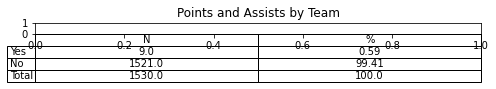

In [680]:
# import matplotlib.pyplot as plt

#initialize figure
fig = plt.figure(figsize = (8, .2))
ax = fig.add_subplot(111)

#create table
ax.table(cellText = ds.values, rowLabels = ds.index, 
         colLabels = ds.columns, cellLoc='center')

#add title to table
ax.set_title('Points and Assists by Team')
ax.to_csv("hello.csv",sep='\t', header=None, mode='a')
#turn axes off
ax.axis('off')

In [720]:

k=1
select_cols=['q221i_%s'%k,'q221a_%s'%k,'q221g_%s'%k,'q220f_%s'%k,'q221f_%s'%k,'q221d_%s'%k,'q216c_%s'%k,'q209a','q209b','q211a_%s'%k,'q215_%s'%k,'q220d_%s'%k,'q220a_%s'%k,'q220g_%s'%k,'q211c_%s'%k,'q220i_%s'%k,'q224_%s'%k,'resp_select'] 

df_ce_withdrawal=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]
v="withdrawal"
ce=gen_df(df_ce_withdrawal)
replaceables(ce)
writer = pd.ExcelWriter(excel_dir()+f"withdrawal_consistent{date_today}.xlsx", engine='xlsxwriter')
ce.to_excel(writer,sheet_name = 'Consistent User', index=False)
l=["Consistent User"]
for i in l:
    worksheet2 = writer.sheets[i]
    data_format3 = workbook.add_format({'bg_color': '#b8fcff','bold':True,'text_wrap': True,'border':1})
    # data_format2 = workbook.add_format({'align': 'right'})
    worksheet2.set_row(0,cell_format=data_format3)
    worksheet2.set_column('A:Z',15)

In [695]:
k=2
df_ce_rhythm=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]

In [696]:
k=7
df_ce_lam=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]

In [697]:
k=8
df_ce_nonlam=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]

In [698]:
k=3
df_ce_countingplus=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]

In [699]:
k=9
df_ce_standard_days=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]

In [700]:
k=5
df_ce_herbs=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]

STRATEGY 1

In [718]:
k=1
select_cols=['q221i_%s'%k,'q221a_%s'%k,'q221g_%s'%k,'q220f_%s'%k,'q221f_%s'%k,'q221d_%s'%k,'q216c_%s'%k,'q209a','q209b','q211a_%s'%k,'q215_%s'%k,'q220d_%s'%k,'q220a_%s'%k,'q220g_%s'%k,'q211c_%s'%k,'q220i_%s'%k,'q224_%s'%k,'resp_select'] 

v="withdrawal"
ce=gen_df(df_ce_withdrawal)
replaceables(ce)
writer = pd.ExcelWriter(excel_dir()+f"withdrawal_consistent{date_today}.xlsx", engine='xlsxwriter')
ce.to_excel(writer,sheet_name = 'Consistent User', index=False)
l=["Consistent User"]
for i in l:
    worksheet2 = writer.sheets[i]
    data_format3 = workbook.add_format({'bg_color': '#b8fcff','bold':True,'text_wrap': True,'border':1})
    # data_format2 = workbook.add_format({'align': 'right'})
    worksheet2.set_row(0,cell_format=data_format3)
    worksheet2.set_column('A:Z',15)

ValueError: Data must be 1-dimensional

In [714]:
df_ce_lam

,q221i_2,q221a_2,q221g_2,q220f_2,q221f_2,q223d_2,q216c_2,q209a,q209b,q211a_2,q215_2,q220a_2,q220g_2,q211c_2,q220i_2,q224_2,resp_select,q220,q221,q222,q223,q220d_2,q220d_1,q220d_5,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_2,q221d_1,q221d_5,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_2,q222d_1,q222d_5,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_1,q223d_5,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,0.0,NaN,0.0,AD3304301-F2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,NaN,NaN,0.0,NaN,0.0,AD2801101-F2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0,0,NaN,NaN,0.0,NaN,0.0,AD0203502-F2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,0.0,NaN,0.0,AD3303501-F2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1165,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0,0,NaN,NaN,0.0,NaN,0.0,AD0600601-F2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
